In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Rent Data.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df2 = pd.read_csv('iris.csv')
df2.head()

FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

In [5]:
import os
os.getcwd()

'C:\\Users\\Study Mart\\Downloads\\ML Batch 08\\Class 04'

In [6]:
#change current working dir
os.chdir('C:\\Users\\Study Mart\\Desktop\\New folder')

In [7]:
os.getcwd()

'C:\\Users\\Study Mart\\Desktop\\New folder'

In [8]:
df2 = pd.read_csv('iris.csv')
df2.head()

,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


# Come to the point

In [9]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [10]:
df.tail()

,area,rent
24,2800,50000
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460


In [11]:
df.shape

(29, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    29 non-null     int64
 1   rent    29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


In [13]:
#accessing area column
df.area

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
Name: area, dtype: int64

In [14]:
df['area']

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
Name: area, dtype: int64

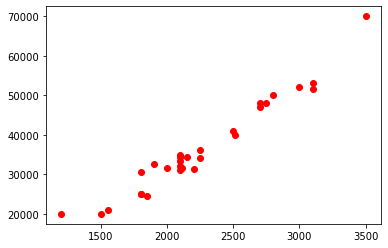

In [16]:
plt.scatter(df.area, df.rent, color='red')

Text(0, 0.5, 'Rent in BDT')

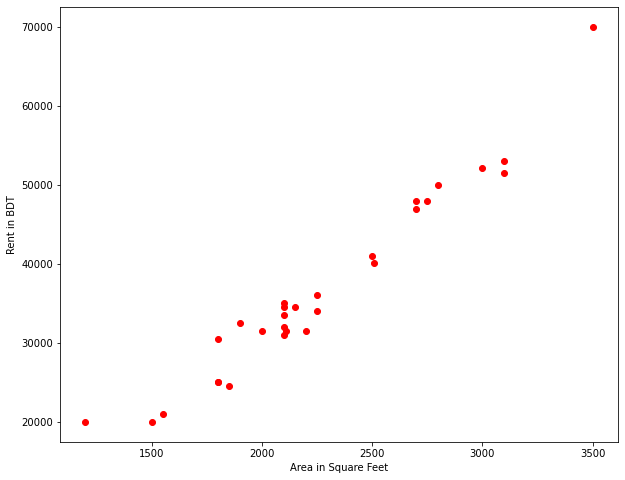

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(df.area, df.rent, color='red')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')

In [21]:
#Sep x,y
x = df.drop('rent',axis=1) # x = df[['area']]

In [22]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [23]:
y = df.rent
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

Text(0, 0.5, 'Rent in BDT')

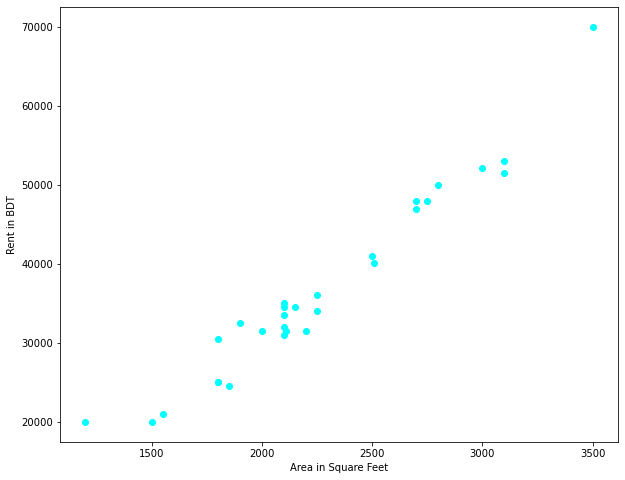

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, color='cyan')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')

In [26]:
# validate training and testing data
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.30) # ,random_state=1

In [29]:
xtrain.head()

,area
0,2000
20,2110
8,2700
5,1900
2,2500


In [30]:
ytrain.head()

0     31500
20    31500
8     48000
5     32500
2     41050
Name: rent, dtype: int64

In [31]:
xtest.shape

(9, 1)

In [32]:
xtrain.shape

(20, 1)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()

In [35]:
#training linear regression model with train data
reg.fit(xtrain,ytrain)

LinearRegression()

In [38]:
m=reg.coef_
m

array([20.90203954])

In [39]:
c=reg.intercept_
c

-10038.131752738147

In [40]:
#y=mx+c
y = (2000*m)+c
y

array([31765.94731739])

In [41]:
#y=mx+c
y = (3700*m)+c
y

array([67299.414527])

In [43]:
reg.predict([[3700]])

array([67299.414527])

In [44]:
x.mean()

area    2259.310345
dtype: float64

In [45]:
y.mean()

67299.41452699661

In [49]:
reg.predict(xtest)

array([42425.98748027, 48487.57894544, 47442.47696869, 21314.92754986,
       35946.3552244 , 33856.1512709 , 28630.64138713, 27585.53941038,
       33856.1512709 ])

In [50]:
reg.predict(x)

array([31765.94731739, 33856.1512709 , 42216.96708492, 36991.45720115,
       52667.98685245, 29675.74336388, 21314.92754986, 28630.64138713,
       46397.37499193, 33856.1512709 , 34901.25324765, 33856.1512709 ,
       33856.1512709 , 42425.98748027, 36991.45720115, 54758.19080596,
       27585.53941038, 22360.02952661, 27585.53941038, 46397.37499193,
       34065.17166625, 33856.1512709 , 63119.00661998, 15044.31568934,
       48487.57894544, 54758.19080596, 47442.47696869, 27585.53941038,
       35946.3552244 ])

In [51]:
df['Predicted Rent'] = reg.predict(x)
df.head()

,area,rent,Predicted Rent
0,2000,31500,31765.947317
1,2100,35000,33856.151271
2,2500,41050,42216.967085
3,2250,36100,36991.457201
4,3000,52100,52667.986852


Text(0, 0.5, 'Rent in BDT')

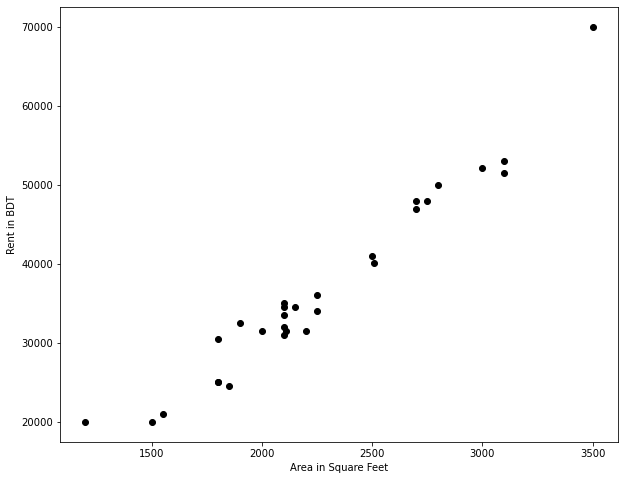

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')

# Best Fit Line

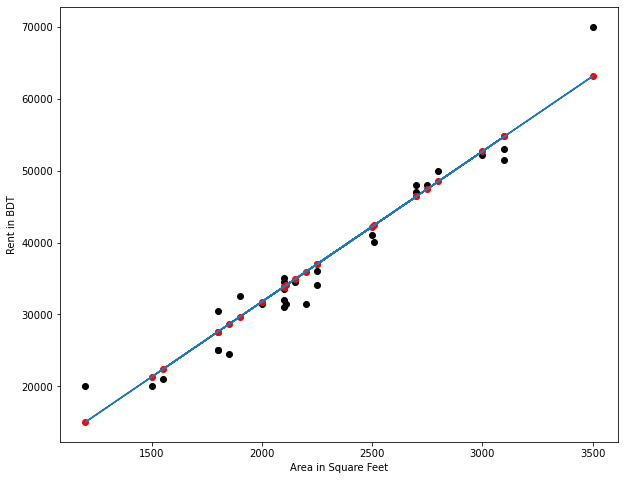

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')
plt.plot(df.area, df['Predicted Rent'])
plt.scatter(df.area, df['Predicted Rent'],color='red')

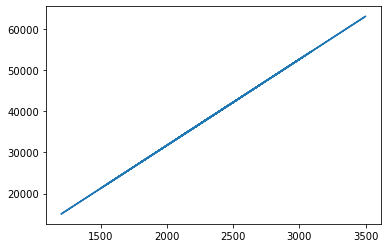

In [55]:
plt.plot(df.area, df['Predicted Rent'])

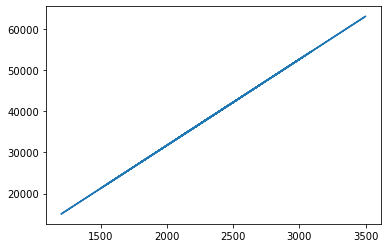

In [57]:
plt.plot(df.area, reg.predict(x)) # predicted y, df.predict(x)

In [62]:
reg.score(xtest, ytest) #testing accuracy

0.9334042603820745

In [66]:
pred_y = reg.predict(xtest)
pred_y

array([42425.98748027, 48487.57894544, 47442.47696869, 21314.92754986,
       35946.3552244 , 33856.1512709 , 28630.64138713, 27585.53941038,
       33856.1512709 ])

In [68]:
ytest

13    40050
24    50000
26    48000
6     20000
28    31460
11    32000
7     24500
27    25000
12    34500
Name: rent, dtype: int64

In [70]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred_y)
mse

6411892.731344813

In [71]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(ytest, pred_y)
mse

2162.5994597676686